In [1]:
import numpy as np
import pandas
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [2]:
#masukin data1
data1=pandas.read_csv('D:\\SKRIPSI\\data\\data_praproses\\jamu_herbs.csv', sep=',')
#masukin data2
data2=pandas.read_csv('D:\\SKRIPSI\\data\\data_praproses\\jamu_class.csv', sep=',')

In [3]:
data_1 = data1.drop('IDJamu',axis=1)
data_2 = data2.drop('Jamu ID',axis=1)
data_1['Kelas']=data_2['Class of Diseases']
data_temp  = data_1[data_1['Kelas'] != 5]
X = data_temp.drop('Kelas', axis=1).values
y = data_temp['Kelas'].values

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
val_loss_cv = []
val_acc_cv = []
for train_index, test_index in sss.split(X,y):
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    model = Sequential()
    model.add(Dense(input_dim=X_train.shape[1], units=128,
                     kernel_initializer='normal', bias_initializer='zeros'))
    model.add(Activation('relu'))

    for i in range(0, 6):
        model.add(Dense(units=128, kernel_initializer='normal',
                         bias_initializer='zeros'))
        model.add(Activation('relu'))
        model.add(Dropout(.15))

    model.add(Dense(units=19))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train,batch_size=24,epochs=30,verbose=1,validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test, verbose=1)
    val_loss_cv.append(score[0])
    val_acc_cv.append(score[1])
    predict = model.predict_classes(X_test)

Train on 2109 samples, validate on 905 samples
Epoch 1/30
2109/2109 [==============================] - 1s 583us/step - loss: 2.3462 - acc: 0.2101 - val_loss: 2.1092 - val_acc: 0.1912
Epoch 2/30
2109/2109 [==============================] - 1s 248us/step - loss: 2.0658 - acc: 0.2124 - val_loss: 2.0313 - val_acc: 0.2133
Epoch 3/30
2109/2109 [==============================] - 1s 261us/step - loss: 1.9504 - acc: 0.2579 - val_loss: 1.9509 - val_acc: 0.3160
Epoch 4/30
2109/2109 [==============================] - 1s 255us/step - loss: 1.6577 - acc: 0.4348 - val_loss: 1.6318 - val_acc: 0.4939
Epoch 5/30
2109/2109 [==============================] - 1s 239us/step - loss: 1.3576 - acc: 0.5690 - val_loss: 1.6027 - val_acc: 0.5337
Epoch 6/30
2109/2109 [==============================] - 1s 259us/step - loss: 1.1390 - acc: 0.6411 - val_loss: 1.5822 - val_acc: 0.5602
Epoch 7/30
2109/2109 [==============================] - 1s 242us/step - loss: 0.9715 - acc: 0.6980 - val_loss: 1.5894 - val_acc: 0.5669
E

In [6]:
#nilai akurasi prediksi
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.5988950276243094

In [7]:
#hasil prediksi
predict

array([14,  3, 14,  8, 14, 11,  6,  3, 14, 11, 11, 16, 11, 16, 14, 14, 14,
        6, 14,  3,  6,  1,  1, 15, 17,  1, 16,  3, 11, 11,  1,  3, 11,  6,
        1,  6, 10, 15,  6,  3, 11,  6, 14,  6,  6,  6, 15,  6,  3, 14, 11,
       11,  3, 14, 11, 14, 11,  3, 14,  3, 11, 13,  6, 17, 15, 14, 14, 15,
       11, 14, 14, 11, 14,  6, 14,  3, 17,  3,  3,  1, 16, 11,  3, 14, 14,
       11, 14,  3,  1,  1,  6, 16, 15, 15,  6, 11, 11, 11, 14, 15, 15, 14,
       13, 15,  8, 15,  3, 14, 16, 11,  3, 16,  6,  3, 14, 11,  6, 16,  3,
        3, 14, 11,  9,  3,  6, 11,  3, 15,  3,  3,  3,  1,  1, 14,  3,  1,
       11, 15, 11, 15, 13, 16,  3,  3,  3, 14, 14,  3, 17, 13,  3, 14,  9,
       11, 11, 14,  6, 15, 16,  3, 15,  6, 16, 14,  1, 15, 15,  6,  6, 11,
       11,  3, 15,  1, 14, 15,  6, 11, 15, 11,  6, 14, 11, 15,  3, 17, 11,
        3,  6, 15, 15, 14, 14,  6,  3, 14, 14,  3, 16, 11,  3, 15,  6,  3,
        6, 16, 15,  3, 17, 15, 16, 14, 11, 14, 14, 14,  2, 11,  3,  3,  3,
       11, 15,  6,  6,  3

In [8]:
#data test
y_test

array([14,  9, 14,  8, 14, 11,  6,  3, 14, 11, 11, 16, 11, 16, 14, 14, 14,
       14, 14,  6, 11, 17, 11, 15, 17, 11, 14,  3, 11, 11,  1,  3, 17,  6,
       11,  6,  3, 15, 14,  6, 14, 16, 14, 14,  6,  6, 15, 14, 11, 14, 11,
       11, 11, 14, 11, 14, 14, 14, 14,  6, 11,  6,  6,  3, 11,  8, 11,  3,
       11, 14, 11, 15, 14, 14, 14,  3, 15,  3,  3, 13, 15, 11,  3, 14, 14,
       11, 11,  3,  1,  1, 14, 16, 15, 15, 14, 11, 15,  6, 14, 15,  6, 14,
       11, 15, 10,  1,  3, 14,  3, 16,  3, 16, 16, 11,  8,  1,  3, 14,  3,
        6, 14, 11,  9,  6,  6, 11,  3,  6,  3,  3, 15,  1,  8, 14,  3, 14,
       13,  3, 11,  1, 11, 16, 15, 18,  3,  8, 14,  9, 14, 18,  3, 14, 11,
       14, 15, 16,  6,  6,  8, 14, 15, 11, 16,  8,  1, 15,  6,  6,  6, 11,
       11,  3, 11,  1, 11, 15,  6, 14, 17, 17,  6,  6, 11, 15,  3, 17, 11,
        3,  6, 15, 15,  6, 14,  6, 11, 14, 14,  3, 17, 11, 14, 15, 14,  3,
       14, 16,  6,  3, 17, 15, 11,  6, 11,  8, 14,  6,  8, 11,  3,  3, 14,
       11, 15,  6,  6,  3

Confusion matrix
[[ 23   0   5   4   0   0   0  13   2   2  10   0   1   0]
 [  0   8   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2  96  11   0   0   2   8   0   3   8   6   1   0]
 [  2   0  14  67   0   0   0   8   2  12  10   0   0   0]
 [  1   1   0   0   4   0   1   0   0   7   0   3   0   0]
 [  0   0   3   0   0   3   0   0   0   0   0   1   0   0]
 [  0   1   0   2   1   0   0   0   0   0   1   0   0   0]
 [ 24   1  11  14   0   1   0 115   4  10  12   2   1   0]
 [  2   0   1   0   0   0   1   2   2   0   2   0   0   0]
 [  3   4   8  16   1   0   0  10   3 119   1   6   2   0]
 [  2   0  10   1   1   0   1   8   1   1  62   5   2   0]
 [  1   0   8   3   0   0   1   4   0   1   1  30   0   0]
 [  2   1   3   1   0   0   0   5   0   1   1   1  12   0]
 [  1   0   1   1   0   0   0   1   1   0   0   0   0   1]]


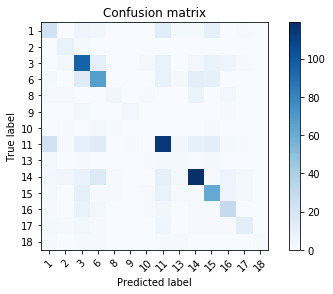

In [10]:
#confusion matrix hasil prediksi
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cm = confusion_matrix(y_test, predict)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

plt.show()